In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

pd.set_option('display.max_columns',0)
sns.set_style('darkgrid') 
# font = {'weight' : 'bold', 'size' : 23}
# matplotlib.rc('font', **font)
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(10, 7)});

import statistics 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot

In [2]:
data = pd.read_csv("D:\Data Science\AC_Data.csv")
data.head()

,Unnamed: 0,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,1,2019-08-01 00:01:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,3,2019-08-01 00:03:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [3]:
# statistical Analysis of Data
round(data.drop('0', axis=1).describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,87840.0,43919.500,25357.368,0.0,21959.750,43919.500,65879.250,87839.000
AC 1,87840.0,2.376,2.277,0.0,0.000,2.091,3.661,11.195
AC 2,87840.0,3.865,2.544,0.0,2.120,3.791,5.457,11.147
AC 3,87840.0,2.568,1.491,0.0,1.705,2.487,3.445,8.431
AC 4,87840.0,2.393,1.797,0.0,1.256,2.307,3.473,9.880
AC 5,87840.0,1.422,0.770,0.0,0.970,1.380,1.871,5.495
AC 6,87840.0,2.516,1.656,0.0,1.539,2.664,3.615,9.929
AC 7,87840.0,2.979,1.473,0.0,2.186,3.003,3.896,9.357
AC 8,87840.0,2.548,1.503,0.0,1.768,2.608,3.492,9.332
AC 9,87840.0,3.180,1.524,0.0,2.293,3.079,4.091,10.027


In [25]:
index = []
for x in data.columns:
    if (x!='0'and x!='Unnamed: 0'):
        index.append(x)
print(index)

['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18']


In [37]:
mean = []
for x in data.columns:
    if (x!='0'and x!='Unnamed: 0'):
        mean.append(data[x].mean())
power_df = pd.DataFrame(mean,index=index)
power_df = power_df.reset_index()
power_df = power_df.rename(columns= {'index' :"AC_type", 0: "Power_mean"}, inplace = False)
power_df.head()

Index(['index', 0], dtype='object')


,AC_type,Power_mean
0,AC 1,2.375759
1,AC 2,3.865480
2,AC 3,2.568025
3,AC 4,2.392969
4,AC 5,1.421627


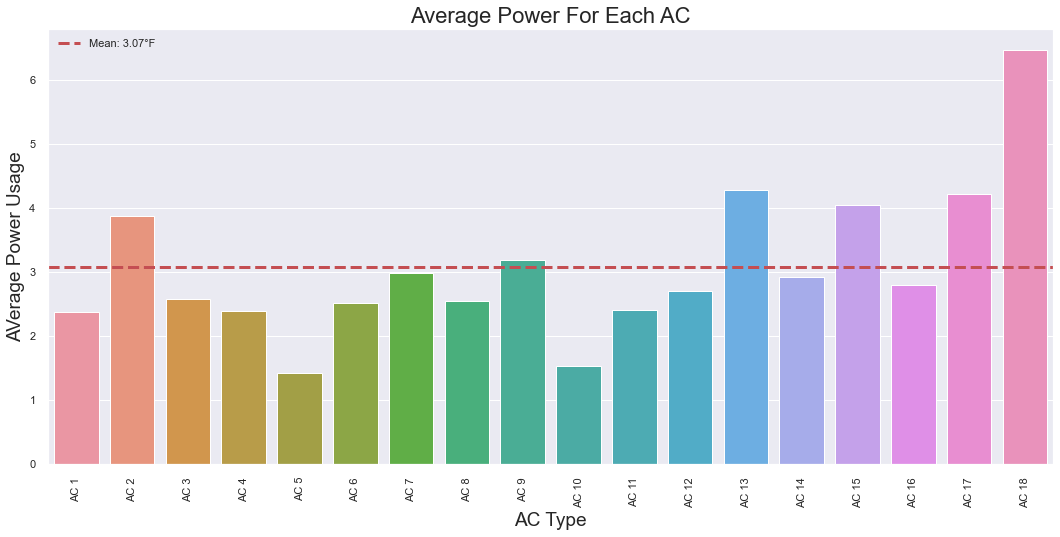

In [38]:
mean = round(power_df['Power_mean'].mean(),2)

# plot Average Power For Each AC
plt.figure(figsize=(18,8))
sns.barplot(x='AC_type', y='Power_mean', data=power_df)
plt.title('Average Power For Each AC', fontsize=22)
plt.axhline(mean, color ='r', label='Mean: '+str(mean)+'°F', linewidth=3, linestyle='--')
plt.xlabel('AC Type', fontsize=19)
plt.ylabel('AVerage Power Usage', fontsize=19)
plt.xticks(rotation='vertical')
plt.legend()
plt.show();

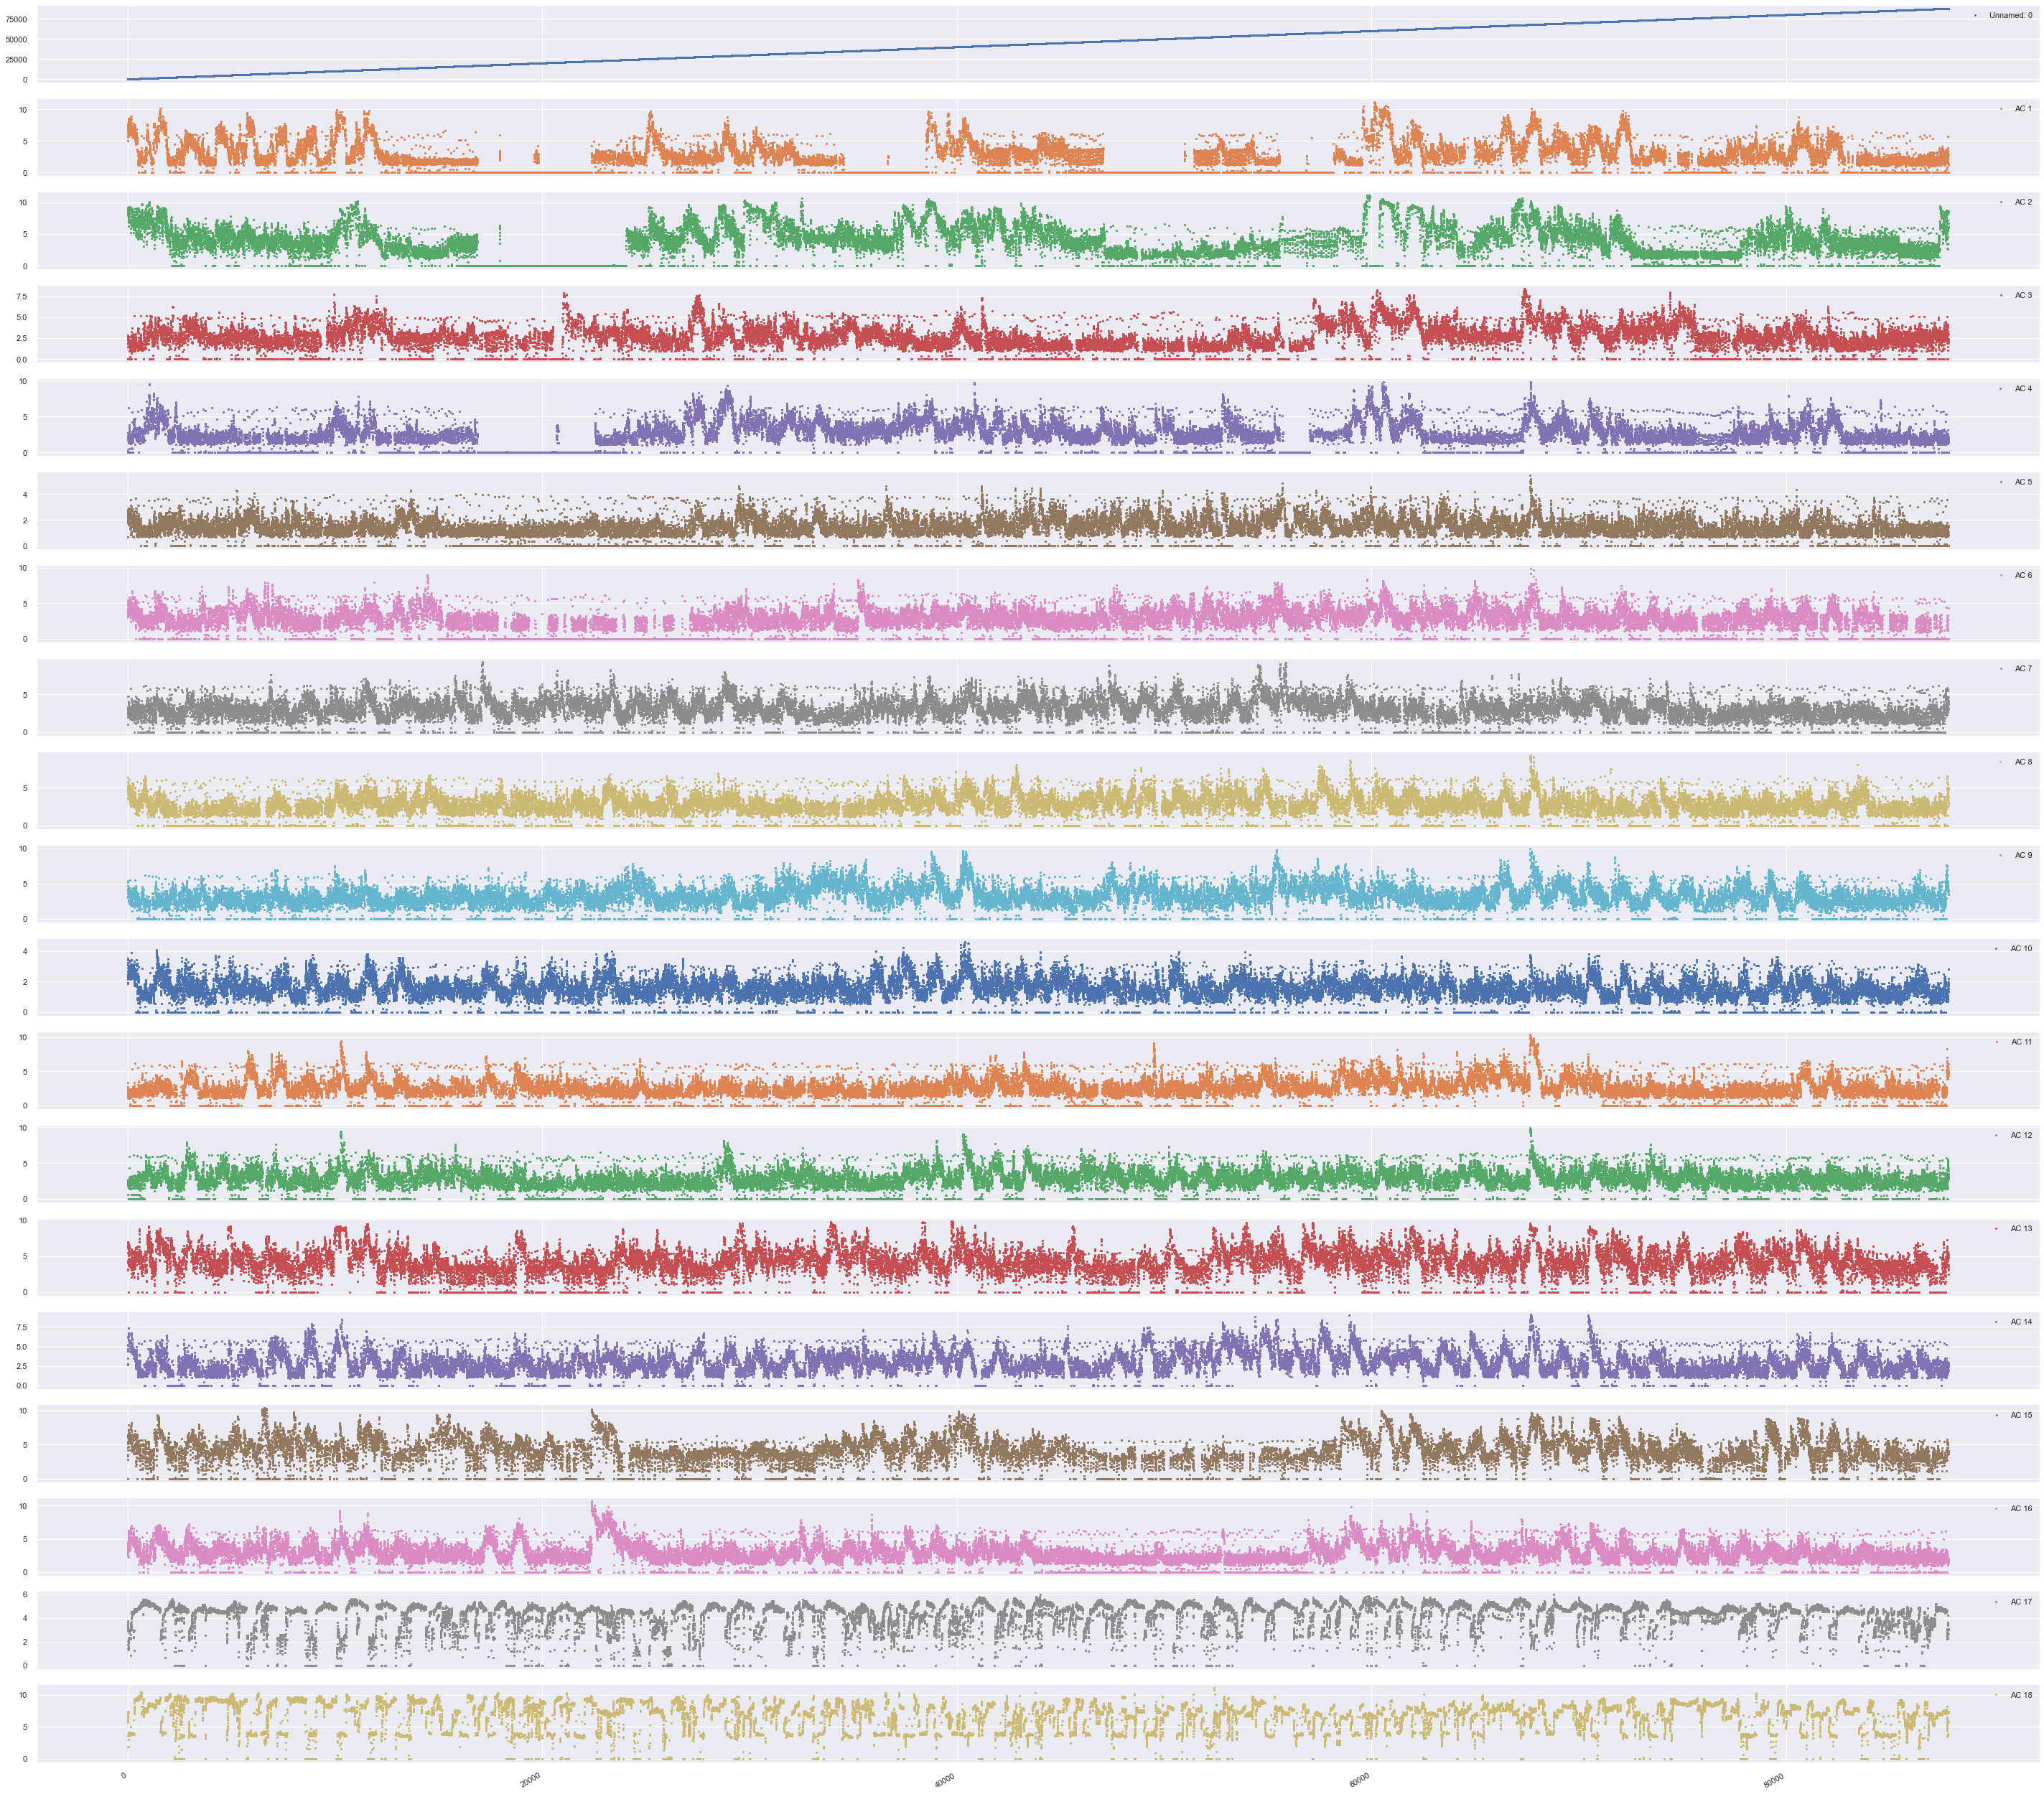

In [44]:
# plot timeseris plot
data.plot(subplots=True, figsize=(50,50), style='.');

In [45]:
#  save data
data.to_csv("D:\Data Science\AC_Data.csv")